In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('income.csv')
df.head(2)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000


In [8]:
df.shape

(22, 3)

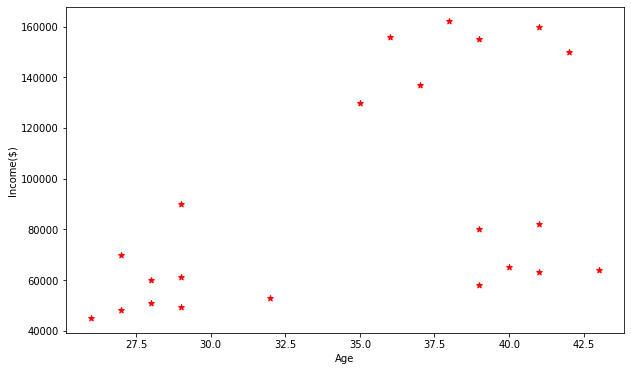

In [11]:
plt.figure(figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df['Age'],df['Income($)'], color='red', marker='*')

In [12]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [14]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [15]:
df['cluster'] = y_predicted

In [16]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


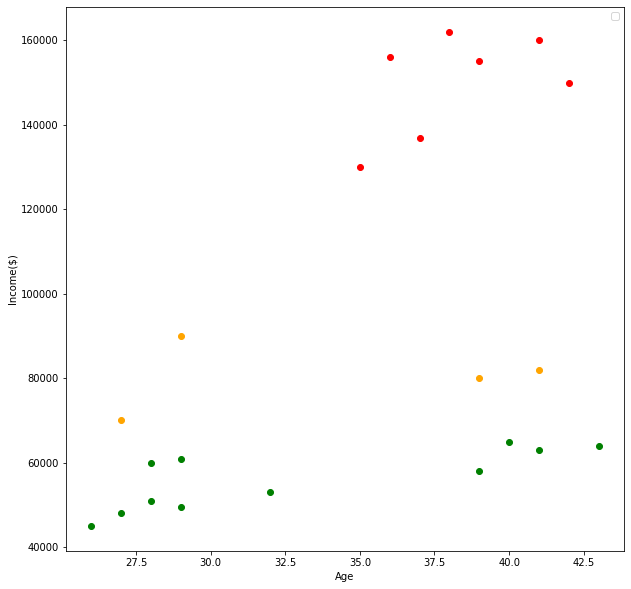

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.figure(figsize=(10,10))
plt.scatter(df1['Age'], df1['Income($)'],color='green')
plt.scatter(df2['Age'], df2['Income($)'],color='red')
plt.scatter(df3['Age'], df3['Income($)'],color='orange')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

The above graph has a discrepency .Although yellow are clusterd together but they are far in the graph. This is because the scales on both the axis are significantly of different order. So to resolve this we will use min-max scaler to confine/scale the values in the given range(here 0-1)

In [35]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] =scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [49]:
df.head(2)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2


In [50]:
df.drop('cluster',axis=1,inplace=True)

In [51]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [52]:
scaler.fit(df[['Age']])
df.Age=scaler.transform(df[['Age']])
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [53]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [54]:
df['Cluster']=y_predicted


In [55]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [59]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

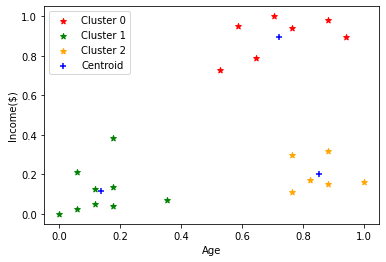

In [65]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='red', marker='*', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], color='green', marker='*', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], color='orange', marker='*', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue', marker='+', label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [75]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

In [76]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.22020960864009392,
 0.17462386586687895,
 0.1327661931978319,
 0.10663983840905437]

### Elbow plot - to find the value of 'K' using the Sum of squared error

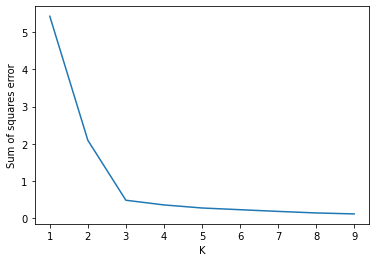

In [77]:
plt.xlabel('K')
plt.ylabel("Sum of squares error")
plt.plot(k_rng,sse)